<center><img src='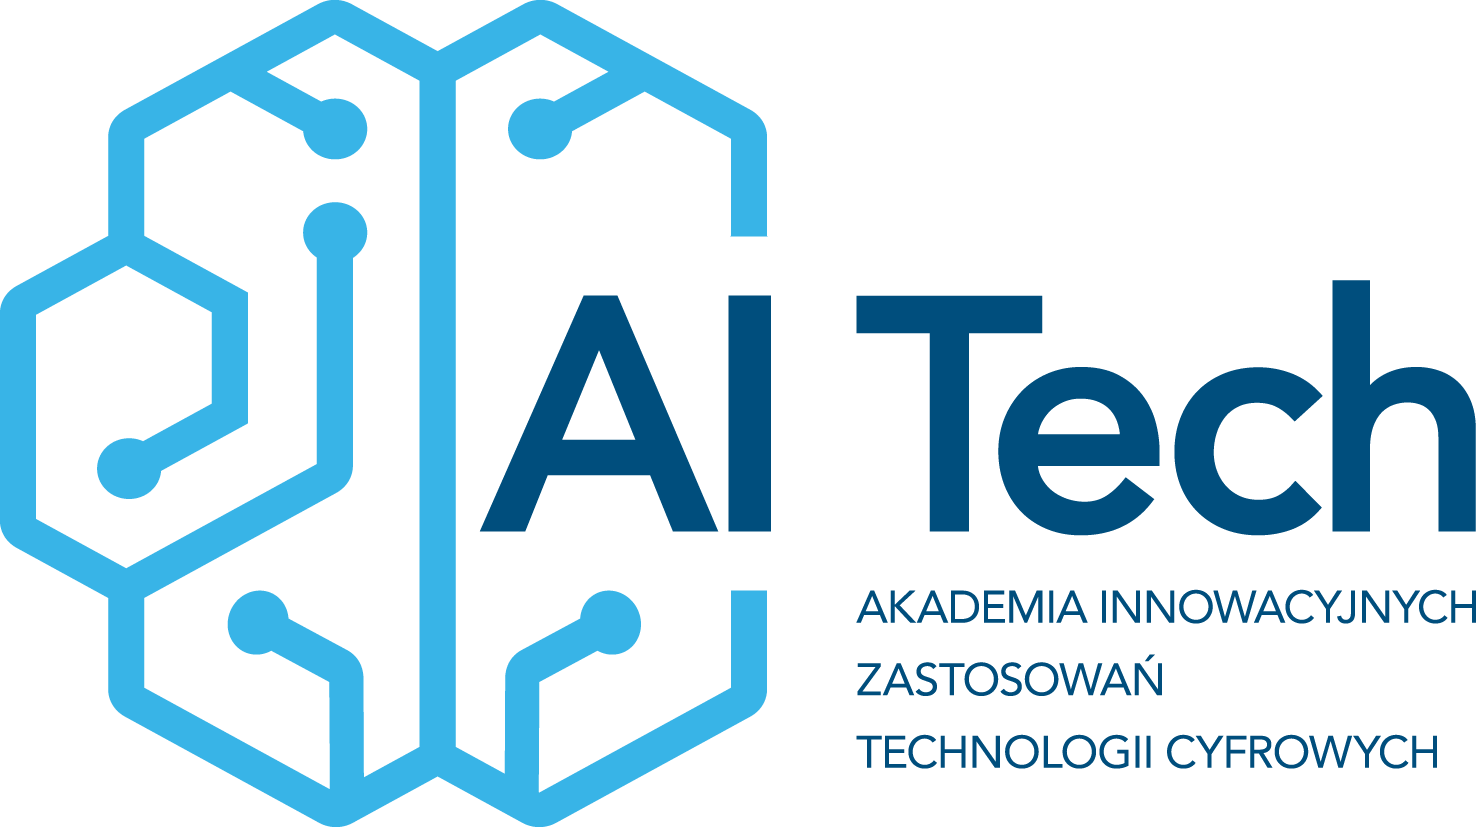
' height="60"></center>

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<center>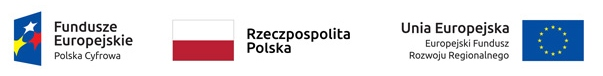</center>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

**Author: Tomasz Pawłowski**




# ML in big scale - LAB 12



Support Vector Machines


## Pyspark installation

In [ ]:
!pip install pyspark --quiet
!apt install openjdk-8-jdk-headless &> /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

from pyspark.sql import SparkSession
spark = SparkSession.builder \
                    .master("local[*]") \
                    .appName("mlibs") \
                    .getOrCreate()

from pyspark import SparkContext
sc = spark.sparkContext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 18.4 MB/s eta 0:00:00


## Dataset 1


(21, 2)
(30, 2)


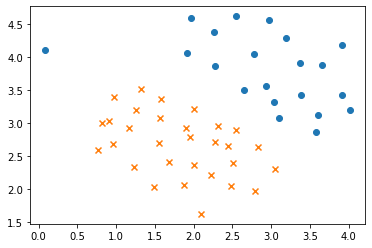

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import base64

with open("svm1.mat", "wb") as fh:
    fh.write(base64.decodebytes(b'TUFUTEFCIDUuMCBNQVQtZmlsZSwgUGxhdGZvcm06IEdMTlhBNjQsIENyZWF0ZWQgb246IFN1biBOb3YgMTMgMTQ6Mjg6NDMgMjAxMSAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAABSU0PAAAAGwMAAHicRVILUExhFL57d+8+2qu27eVV0iSNkmehsv9XGarxmjLZaNikmEXDlKSShiTs5Fmek5o0aIxHybO8zXhMih5EhJgek5BWVtp1r5r1/3PmzJk5853vfOezpChKI6QoMZel1EDmHzNYT+GC5kLAfTWXZVxM5Pojs6Y3PFxnIm/LM9NqptAorrzr4FYrwRtDurYiUYKN9DHpiHwWe+/p3aOsFHDJ2bhhxBA5xt7LOr041ArDEl4quwPE0CQtcLLXirAjraYsUm+BuN5P0YUNUjw0lqZ2XzSS5JRiz6CRNNQzLj9KUjHIC9qztjVVhuL5sIkOGmLGU21Wn/GuYlFb0WLrGCJFzNbGmZvVBnJr4tFxQ+0oOMd0LQlU/ecbqGprPJdCo8Vn+J2lBWKsf5b94p1Giiq/+c/3NwmRV8puOCcXYfKm8aNH9fSbcYyxPMEf5P7KEs2iMCPRfK5xeWP4RY7EK7ffefKLhDNFB3wFfcTvH2AvWaHgmXeRwlVlHQnl3WSJ/vrr3f3tpKe/Lrnd7SsZULuHjPknmJ7YdAdUx9ULULDr4of2XCGuZPLCiNGVRryX3aDQ58sBh4lw1qZm1qtvnYSfNi+zjfj98Y4scrpCTrcFe5milUicfeinuNkSze/lB88GKnFkrp0uVMuCpT122jeKcYlDL9XJkFhu1/c0Xg7tvB854ZcVyK2TrXbxVCDEyzS6P0mJjKvY9nGOFXShHaKp+6XoWRux5byPAq6HTfvSU63x4JJXfJGARUNE54SbY60H9bI04x69mbfP6rcU9dy2k7ItEMUboskCPv6VYXmFMlQwSlsyW4xTzbcsT5QxcPu0Pb+qRALJco4xy2Acv6iaRpRzwPeYuRQG7iDEqvpWrUcSBX0o70QanrHDPqoP0zhZVVJdHyEx8+W6c+t2MXj8mZxqVgnBmXZqxjRq0KcMXN3TddfXSODPnT3KKMGXfH/PuuFysz7WPFF7FtW94S3FxwXgmmUGZwYOwQv/DE0wkfu1HtxkA+Hp/HSQ4NoFYavOXYqM4NtbHK+JsOxGCEuvUeAvUZResA8AAAAqAAAAeJzjY2BgyABiNiDmgNIgwArlGwMxIxgzMlQCaSaYGBbAgBdApAF/ogGR'))
m = scipy.io.loadmat("svm1.mat")

X = np.array(m['X'])
y = np.reshape(np.array(m['y'], dtype=np.int8), len(m['y']))
print(X[y == 1].shape)
print(X[y == 0].shape)

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')

## Example 1: SVM hard boundary (local computation)

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


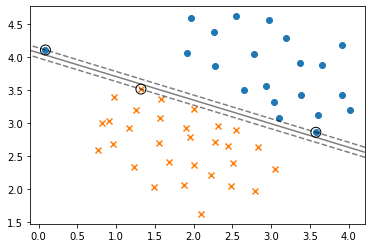

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel="linear", C=float('INF'))
clf.fit(X, y)

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xlin = np.linspace(xlim[0], xlim[1], 30)
ylin = np.linspace(ylim[0], ylim[1], 30)
Y_grid, X_grid = np.meshgrid(ylin, xlin)
xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
P = clf.decision_function(xy).reshape(X_grid.shape)

ax.contour(X_grid, Y_grid, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

## Exercise 1: SVM soft boundary

Using scikit learn find a better linear classifier for example data.

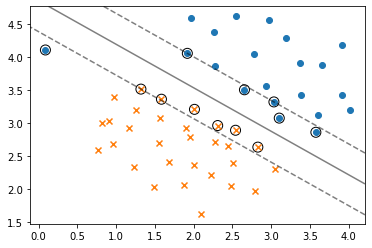

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel="linear")
clf.fit(X, y)

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xlin = np.linspace(xlim[0], xlim[1], 30)
ylin = np.linspace(ylim[0], ylim[1], 30)
Y_grid, X_grid = np.meshgrid(ylin, xlin)
xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
P = clf.decision_function(xy).reshape(X_grid.shape)

ax.contour(X_grid, Y_grid, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

## Example 2: SVM on spark

example data: [LabeledPoint(1.0, [1.9643,4.5957]), LabeledPoint(1.0, [2.2753,3.8589]), LabeledPoint(1.0, [2.9781,4.5651]), LabeledPoint(1.0, [2.932,3.5519]), LabeledPoint(1.0, [3.5772,2.856])]
weights: [0.617674061527105,0.6508343972464772]
intercept: -3.6343262291760574


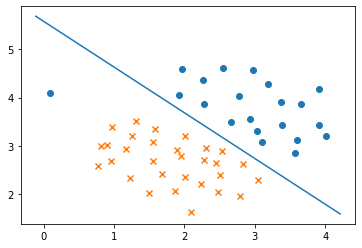

In [ ]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.linalg import Vectors, VectorUDT

data = map(lambda label_features: LabeledPoint(int(label_features[0]), Vectors.dense(label_features[1])), zip(y, X))
rdd = sc.parallelize(data).cache()

print(f"example data: {rdd.take(5)}")
from pyspark.mllib.classification import SVMWithSGD 

lsvc = SVMWithSGD.train(rdd, iterations=400, intercept=True)

print(f"weights: {lsvc.weights}")
print(f"intercept: {lsvc.intercept}")

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')
xlim = ax.get_xlim()
xlin = np.linspace(xlim[0], xlim[1], 30)
plt.plot(xlin, (-lsvc.intercept - xlin * lsvc.weights[0])/lsvc.weights[1])

In [ ]:
print(lsvc.predict(rdd.map(lambda x: x.features)).collect())
print(rdd.map(lambda x: int(x.label)).collect())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


## Dataset 2

(480, 2)
(383, 2)


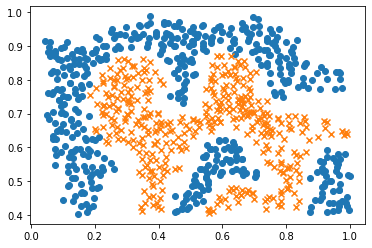

In [ ]:
with open("svm2.mat", "wb") as fh:
    fh.write(base64.decodebytes(b'TUFUTEFCIDUuMCBNQVQtZmlsZSwgUGxhdGZvcm06IEdMTlhBNjQsIENyZWF0ZWQgb246IFN1biBOb3YgMTMgMTQ6Mjg6NTQgMjAxMSAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAABSU0PAAAA5RwAAHicdFkHWI3v+z8iMzMr2SPzi5bxDXeEjLKpyG7wRSIzo+wVSUZli6wklWQ2lJIT7ZxK43RWZ5W99T/9zvk873Xl+nO57uu87/M+z/3c43N/7lsLHo/XfRiP11AjG/O0svaPvu734vo8np5G1tP8ddTIJpp/1ZY8XlbGH+uHax5TDb/7mMiKBxTbVnE3qvVDGsB7Yb5C9pzWmzbMX/crnZZIrL4dqp9H20MCOwT7FlFu8LZJ30oqSM/t2Z6LI2S0mq84aDNMTvHBQYOT5ZWkPV1GqR8ivBOeyKizSaerZTdllOJX/aX7XhmV2dl1WPZZxtat/fhi8tJFMmpvnlS0p5WcyQT+5mrDRkK6wev45tLlUvLyXXKsa3wJLbK/EBUSUUxXfHYfaWdZRDGS1MXzc4vJ6Oj2Re/nlNFc81X9u6tKqepVsKrpjnw6Jl742XdrFsn5o3tvr8qgvu791FsCX9Ej94WhYutE6hnxdVPYwGhS+kt2jm4XQc1/GzqH33hIoa+LbZK+PqMol9odEsg9JPK3i18ijVweZBjz8iltXuHo9yj/EcGO09puHxxh94BcCxqFhrrdYxL2NQ2KHydJTybbV7u6/lf0gjzMbhlUeCTRQPNrnx80eELGrr/dlj1Kol4r+L3l+s9pr+tqmZtPMv023/Mt4Vg8O690r3TKzeoYpq++88RLkd5xbL9AnuX91XdSaOTZYzyP9ik0eeUw/+dLnrHzz9Qc3/nz39e0krd2V4OULLpsF/oypWMOycwvlfiF5NEpt48jDCR59MloxtqJGdl0wN5Foncmk+YF978T3yeTvC3yAr/bvqJVwQapH43SKfJV9UWPS2nEj+q7K2NkAV2I1t+b/7yQxYtl9Gm97D9vmcT75KBPX2dtKaQ1NelTAmcV0oOo8e7BE94R8W7anyt+Rx4J0gOtx5XRej8X/xnRZdQ/Q7KuI7+I+V9jnEvFsdw6C/u3O81elFEHt8vncwYJdecI6bPdENPTlUKdnUVkILl7/KGZmMa6uWdZtZPozhPTKEGG384YKYvTdKPDViUiCYkE4gXd5knpllv+LOtCKQUYjIy9cJmTiGetPSvpmmBUiz1bK+mIUblqbONKtl/36GjZ+abcdzgP55iENbv3I1RMISaryWi5iE6at9385CWnF/LNwveB9W6hjA742d7ce13Ozsdz5FumgbC+1U4xDUkY8+9GVyHN8PrQ09CznOqZlyZO71xGe8yOmnRYXsz8Av/XRmGr2wXk69aq29v3ReRnl3A3oHc5889UiWPJ3JZFOjsX0vWMEc1n7iugQW57HzTqkUvNjfxnNZmex9bDP+P4feYW2ZfQcKO5+9cNLyenhAYe7+wlDAd+rXd7PO5iJRU6fZqm7yynhX67NnaOl1Ck02Dj814SZpdLRsmNNv0SMnz4LkjbOHtKOcv/eW5TFGublDG8yDF/muwYVkT/mU+zmVMuoF52MwcfXczpizzQ2i+T5cfgmh6/v2zk08I/Nj9UijSyNj/YUvkthUJqYc7/Bf3iXR22bn0qy9N9QVNvxZ59QpP2zePfuR/L8v42/2R+aZsEln+ONdKhixclMPy5af71ePXTVJZHwBvgEPBplds/+ld/c3iC99FdlwdefhPJcAE4rrnklj6T5dTK+j/DvpsVDFdDvXYerrCupOnWhkufz66kOTw/98zMAoaX2bwSvSaHc+h/4RqXS7bSX21Td2UzOwEXgBu7a+64pE7MpfX2u/ivr+QziX3O+5ok7b+eTSWSo4FJTzKpPKrp2XqDs2iEncWkxNlZNDsj/JpvzBuGM1gHvD7ufmbtDscMXT5l0TSfL70muOQwPbCf9n7ZlMef33TSzxwKMvO0nuqQz+7lwG+8tuW4tzo8KGS/xwVPDDxims/iH783Gf3Jad62gARBBa0PrM5lddAlKq4mbUMe9QtpFJl2N4fdE+vwHt+XGq2Z20bwlsUfcO9W8P22x78UsHhEHiH/oAfyCbKbb67JNDVnZ3wnFFc6z5wioIO+NjdmRb+l/JqR/DMdilm+ok4CN5Vmv64b9yuhExlzP3YOeMfyXZtXnH44D+fgPfbV4hpXn5HvnrWA5l2mu3+Z7v7lDI+Qx9Xxp5RvD4ooe/2lA4WxYlpg8vz99v0SGqk5jWz+xlnE7zDJxuQexpwEjmA9cBv7vg7r5Xt2gpjVgzCDzpnZp8p1+FfGeMY/wcu3Oowupm8dw0fkzS+ikT6GTVt7CpisW58gf9KB7x92l1Pxh4CTnyKF1Nprct6mwArqY23/z4JVYqpyKlgxcoaI4ZrW/hIdX+H0ldDV0mfHpPQneOz2JalSxqOwDnypbUZ9R1FBpQ4XKqkoPir76kk5w88fBjeGh7pVsrqA+oF6wveZFL+ji5Ri7fZXfDcQ0zm/Ac/jznL4ClzVxkWFLn5ETO8JH3ntv28UMTtivZYXCHV2FDF/wj+ok9r8lVOO27n9N5IUdN/oeo9b1UrST9jSsPkOtY5PVNEru5W//6lXRdsN5p37746KCsyMjknNlfRVzN+0b4yC2QH147FBTWXDwwpqFp35emV7FXmHnen4aoOKIv2av1P6q3XxrGb7notvsq9xHLcfpItX3ihbFwUN/djlV/IuuY5vVjCprdsldMds9nyfqZlUYTG+3R+DDFYPUCdQF4DjO3mzzo54eJsul/fLHVzvOnsPfrcjY71Adu45tbZwa/N590v6dsfUZozNXTrU9fzikdJwtg/qAHDAx9x04cG8HIar2nvk6Oq3gOEP8K9RzAb9ooMcHiDfwauBQ8hr8Llf1ybsOPG4nPUB7gZeu4c9rGC8CnwKcQLeg3wGr2nq+96g0w8R2wd5Cf4GiXjS4pmI1X0tH6ygR4Ju/R6sqaDJviHzY/OFVOiX02ruFuFfeYg4hvwSpYqx7FnB7gN+BJlkNmxDNAl1OMetr7X25gEiljeI74YfHdKcgzm+ArxBXtWV4DPABeg/UxAZFnWjnNrxKowsPpWz++A5cAYS+Qqc2SbYVNgpQMz8AQmchV77nVZILY5wvBD7tWx+ZGbBfC7fUb8QD6ivkOivUAfxHHkB/oB1U6K3dm74MZsUNZ0lr5pxdQVxivNQZ8BPDUN6nz75WMDq0ZiMl0fsEvL+4i3vXYab/8h6zfjAZrt3pxYOLaUX8W/iPC+Vsb4Adm/SyfyQdyJnlwZHg8c/XSLR8TYZqy/X6WdAzygOZ13DYv6c9q1g8VWXZ6Pewa+IIxfrL95fbStYfCGe4WfgC+Lb1knTWUdw8QJ94Z+lRsaaFBAzWbfe4Dz4FfmK+EU+go/fi1deGBUuYXUIfWRmSDeflTOfU2LNvKjlvZIYfwWfDRjtN//2gfus70XfCl6K/hkS+6HfRV+J/dHH9hvdRRCWFM3w7zT/3pPbXWMZH47wH216eUQkw1Vj/8bbLY7cYucCT1P+RG37EJnO6izqEPAdeI86g/rzr/VQW//FVbTId8cGebpSNx9RkJ3RiEvXBnK8GnFyKLrnf1feyJhE34j5CPi4myAwQXJOQSZeg6puHVDp7qUm6fo9l1vcriKrMHX64KAqeiPQG6dYqtLlDTdnAZ6ij4VEXqPfQt+srb+ZVGS60WFTIp+mv55R/N4klc0H4Gf0OZgDoR9BH4P5Bfoj8PNnbg9Xb3j9klSuRStXjX/B/Ah/w4+oX9gXfQ+eY76C8zBXQbxg7oB+YGGn+OopJ3IpvMYraMiQMlaXwcvAT7tIh5UvCi5hsoWdR1unVe+YrPscvBh2DHadrnfWi5s/aflZKeO5+B7rwKdPBWf/WKBXQmZSo58njr5l9Rp4+lJya+uxtHyGh+hbIlzNOr9xf8sk+hXw+0mdivPbX+DmKKjvmKfgN/oC8Ff07eDR4E/IB8Qx5hfAu4sS0QSTMo5f4jck5hGIU/Aw8NMZYVmiZX4cjiI/gDM4DzLZxMxr11Quf8BbrbxaNindJmU4DdwC38AcBfhWl98CP4GvwGnwAPAQ4Dv4CfgH9kFdBX6C7wLvTU1+P217Qchwvu45iBvMLYw//is8frSMvYcErz4sqTfog6KMzW96+wytLt5Wyr5Dn4X1eI44zRA3tOkyr5TFM+pi3X4NfSLiGOsxz8F7fF/uM1Bwr3U5m+tAzxSn1pZZ7mVsvgH8rR98fkLVnDTdnCaN/XatZxi3cfhLNm8Bf8ZcFHih5f/Jf803UYfAv4FDWI95TUf+4h5erulsDgzeDtyBBG5hzoL6hPkE5qHo5xAP2vmRhM31MF8Bv0be4lzMP8CPMC8BvgKvgXuwJ+4RFuI0td7KN2w99sU8pe736CswX6nP396I1mUyvgZc/e7e8P2uLm/YOvAq6Aleh3kM5h+Yo2AejHuDf9TlPeDj4F+QWtyU0EZJ1zbPvkr+mpvC7lr9uL4D30GCD6HfQN8KiT4B+oAHo/9AHoO/YY4MHAEvA7/e6hU3b5ujmPUDWnxXM14BeddkupO9g5q9d3a6Es2/oqbezT1WNZuuYhL8IIsSUw6HqHT1WcX6V619q6iRyfDD4ffVrM8FnwB/eODjem1yfxUts/uxrf8olW6epdLNQZU63q74f/VD3wyJ99r/L+DWa5w7w6Pobx6D76An+v2694SeZ2vD2ofTC3069Mf9jws0BWlflS7Pqtj54G/QQ9svV5F8gWSDk10F5Z25dj7klYhEj/qL75+QEM9TKfAy0tSd3s5pveIUZNuli0OvxypKaWC5vZmCk9Wr/Us8u6nogirLWN1LSTMvilqcTZOThmReFI6Q08u5g3bOdlTQw6THzsmblbpzlLT+2gX9y0/ktHDmlMbz5lbSzfhFSxN3yCj6XpuP4VflZJxXaZ0/W0kKq/h+Y31U7Dt908z7Qy4p2P4HJ8cdt/VUsPerGwg3/tbT+EmsKaRj1EzPmABF2MkCJdWa2/KkgtxtaiuBgv0ea7BB1UzGSdPgAR1P5cop9wG/MipITs719nn/aCwncYhe8PkUGbWqv/Cn3g8p/Vhk4+k8UUruOa0TMpZJyGvf5ocHq0Q0qih0eLGtiHo0fPRF/1OF7r5C+vx0f1mcn5COeh+cuLlVBW2JtV0b5y+i4bdydoVfF5F+YkXRY03/HNND46FnUrp67NjtgHcyZiern+l7PrWV0+Z8j8eZtf8vUL5wsNBKSQ6RR7dEnVUyO4sHtI/vH66gCN9xo3c0UFCrQM8e/hpeotWL88PVP9779L+qdH5X07IrY5teSFJTaMT9rzdvqUnctGp961IV3Rwy1cryjIqafogOUJiomV+Cn9Rze7ZHSTukHfrIhijZ991PZ3Q+Uaim0kNOQ/Z/ULPvcF66pb6Z1RHOL4WaMp2+itP7f7Szn8YPW2sRWUUrehXY97+rYvpAP+d16+Z49Kyi5Ji16rsXOH9jPe6F9Sap57MTvdU6f/2tz6BJ5u3t3VV0bP5SjWtVOv9wdtX2DUoauGL+MlcLzq7Gn1sdVXeX0yOzG8NGBFTSTocGNQsmV1J6SkfH1HUyWlOriKWM3uz/pekE5Ww/nGv3p6/P1xZqGvhtzcH3nTj7rplzvb7TdE4ividmOLxM9VAzfRG32nxW0KH+AeOHhHL3v1G6745giprlMe6H8/t2WL6kS6qKfYfnyO/dN37yrsaqmYS+s3yeJu3+qdT2/YYqajZuazdbLy5esA/Og93HnjtgGPRazfTDfe4uMdaUVhWLA+Tnz9dDpmQuVjJ97KepDGYv4CSe/x8AAAD//2VYe1hN6RdGNzQkUoYicqmUFNEMWZUwch0y1SiXSJFL5JIo1yjElIgQiUjKNT9pKpKJiKJQnTpnn30u+1zDKIT8Mnuvbz9Pzj/r6Zy997fWu973XWs3vi59rGCKGvQcK3Idzqig8cAt2zi1EjJnrds7Y6kKhJ8mdWkxVEPTqYVJZ4r4OPbSix2XL6jh+N8dlxXuUkOH/z5qmOLqmT4uVgXDQ/4MDBqtgsNZvl8yriqhhjl5WuyihKIlEepgRwXkvBlh9taCAccuZu86a+XQZB9+xy5DDpPLfR6VrpaBtGvjOmOhFMJjNuXFNkogSm42hHGQgONx2z5HqsQksudK4OCfi1sWTJSCocfmAVPCpaAaV2Ttvk0Kkjs20txEGURtGj5tvakcnjUz3T4YM2D3evL4mhkMSFM6HT/1gI+m537en3FDDfGRsZM39VBBnlh8UeCphDtOF8e4JCigh07A504tcjAMPBO60E1FcHs0zy56ri+PH9bdVLBHdPuAEm52fL2981sFRAwdPdUuU/HDdZters6v8FfC2L5351veU0CHMHVN+M8KOG6nBadTfOzX1CNea6kEUxP9oL7lCvDYuqh0W0cF7IqturlfwYDy8fOZ5UEM9Av6uizwVzmU3FyjvZIqg4vCmOwaLxlMsbDwscqXwrNl1fIVw6VweL/j1YO0BHyuxkdcPyHh+i3h+k9D1f+eKK4fE4OvZeScobkUBO7sWxjTJIKQG8rw3CMiKEn67WxypQjGfS7b9d5EzNUjhsCeIyTGAhrsfhtlOiNYCvrGmcvNXkghb86znbMXyKHsQR/f0rUMVBskbuouVRCce5e4vSrcroRjAuvrL2fzuKcGFDYtdlVw5zKQWbRg8b0oBs4dPJiVUM8QfPB6Nk+G8Gr4x1Wxb/vKSN15xfn+JZskkN7/bKVFCQ3BE1uPu2+lub6IufPFXB8o7nyK/J6qqeyntZJwepBAnE2Cp0O6FIaWnnp+L1JG+oDnz5ip+Wnu/Lbfx+677JxEw/TVJn6h1jRIbU2LbC7TEEAFjBCPk0B18vlTKY8l8GbloYawAVJyX6bDtHHOyVJyTvs6Sgb7P7S6TcPvpyXdTzwUQ3O3thNqKI4XIg4nEccbClatfzprrTkNEbemrLl9SEKeV+as5zRuvxSUqk8pUieeN8ijru9uJKiGykg+qE/kEfY7tubxrRd/yAgemDfy4IGu81ZDFa/PnRc/dzh3SwaWR8vNE2tlEHjWvWtqMe8DeD3qfM62guKdnyUEt9ipt/+aEkZDznYP1yhdGm5c6/nv5XM8b8dP+8t49mKK8x8KPk8wH+y5mYIxZS3lJevFsO58ql7a37yfsL7G14V+cq41Mkbvw48R8WD796M/snmqoejf/T3fm6nh81MHr4qFag5/NRiHT63e2EsDq7wv6PjN0oDjZp0nWw00xFfZ/Hles7pjQD/t70Ppebx/oR7QZ9j6ef9A30B/Y3nD+zXLHyWHC69DjKhT9HPUpWi5E71qSJs/Hg4beEikJM9jdaclcZjZkkUWpRrO57UEL8QJ5wfm1a9a4fZyblv93Jxi+6+BK4v6vV06VkP8uv11LJ/531m9qjmdqwjPELd1vfcLTV7KCW9RB8jv2ocb5paF8jpj/Z4G/44xkS2dxURn7FwREV2hHtB3ke/oC/5r13qvHiQn399MUGUkveL5h/p/1EY14QReF3hf4a7TLttbZbBSV7zhayfe39CX0K/YftNcX2hw/2m9xpChiU+jblAP7JwRQ9Jni32dvlLET9j5REGtS6D9hBiK6zsFAzdmVGzu9qPfYMS5gRG/j807tyI/TgSGzw9MeuEnIs9DXH0qbpaUhfDzHnWOfdjVh6k1q6B/0H/A716d/5hHcfrgnz+9ocMooTt/Lv7O8kBE6saI+eD1iAerAzE3r3h8MbL6lxAfRf+s9Y3b/MccObif3Nvr2FMZVA3Luz/0upzsQ6u+E8GZgZsDvz2xLJSDMM7PYc87vr+sP0gJT9Cf2s8vxA9xQP8j86d12LYP3WUQMXn+Ec+NcrLX4FxF3oVYvZphc4X3Ocwb68B5jnsbqz8J5z/83ER+4P6CfoH1tok6zH8yz2fkN+aHe1v7uc/6uIKrV8nxRUm+x+tRb4f7TXrZt0xO8EX88flsngrir0MvbNyTmc3AQeV6S5UNv6/ifahb9H/co1ieKLg5qyJ1o+/iHEC/Q7+N9tH9Nn8qvyeyvGUI7tgn9CfcQ5B3uL8N1L/TrPeeJnMT80U80MdxT0F/Qd9oP0dx7rePyCOsH+9n55uE5Ic+g/igr2IdmCfyDJ+Pc7f93srORynxZYys30vI9fh8dr7y+5nePbouf4+M7Mmmo+2vOaXIf6gHdYd8RD3jfoh7BPoaq0MhXK+KLKo8SMHU4EWSoHLexybtMhkf409Bz4IDgXlDxOC0sXhamJKGdf8tWjS8csy57WJLgbnHkRTX2SIYkbgx/dBm3l8U0TPdo8eIYfW9OQF3p1HkHPM2WnutosD6bV4vdVEbXtkjo66kMZzeVbD4QebL4ssabp/SwFz/ec0BxlrQSS5NSXBXwacdWeN3jFTC+kAjzRI9JXzJKo3K2qCA1mq6sPoOA16eH83caTmJ745mDTixlIG7FVaTn9krwED1zVz2WAH5W1X3I9OV0HFVll/wFxVXjwZyW492+PJCDacveehcW8mfh8+/LbWyUSyWw618A6bQnIHiFtj7aR0D2RmquBxDIdhcC92SP6QBViY1nYhTCGDqq+mFNbI6+Id6ckXWoQ5ylnzvUC2sZez7N4TXwWtDvZUGVvXgmz394/loIVyy65pvHSmC16l+Pc8MpeCv3VHj4mJFwDiWjXIwaHufcSv42XlhA5Q/+f4RwCWjwY3mZXUQlNkUnW5RB3fOJvW4fKkWZAY573SLRaBydrW2niTk3o8aYJ5pTICJqwCc/ATblv7K54Xfv4nbcGnrs3oYeTL0WNpbIcdTEcyel7bD9xYFwS+M75YHisFvRYEwpLRNb0GUKjRABE/jXG8e6i0C5zfpfZu3NJD6MB/W9xpA4uXa9upbT/JHnBbPK/gy87AAcmf6H/SxFIC93rmvRlf5fDDOLp5eV3S9nuMnHxFHReqG+KM6AoKH5l22kSq+luSBdeLzsV+ID0bEuX3EfOsXumrnZ/P93DB+2Rmn1hqCG/aN9RURtwcIOf4ICU4PI5K8IjwauPcsIeER1nutxeonnaN8nYhPe16x/eDrxPoQZ+QB4oT3f3KU5QyR1JI6qBsbwq6OreVx5XiYvCbKd423mPyNdWL/T97Prb3fIIKR0zO6Tj4vgiXq3cmiKiGkBX9/Eeb5WmmpN2ugTx14qKen/du3FsZkm3TKK6khfcH+YsS8B3dbHWo4SwQFv/hnuarrCf7IY6wDz0P8B9G/21JdKHiycGB4UIWI4Is43ItPsk/cKABRs26cRttA6kO+nzHT+vdZ3sjNmUbOpxrh+3rrkaOF5pT+JklnG6HBPKe6f7MWjrzOLajv2QiT3hQdUfsq4GzVAs+6a0pY0/3VCqMtKhhS1jDnabKK+NdjI39pl90KePpL2yR9xMCeASdnWQxn4Hn81Yuxc+UcL+QcL2UcX2RgEO19P/qZlKtDCl9DXIJWF0pgrjrEXPlBwvm+DDrZmrvbTpLDguFp+YNnSiHhrfWRN7sl3LyWcHsGDd2+XNzzNZWGb4neGcd0JCSyONPc/KFhn75NRNc8MTevKAgd5uUxSNOGa69kundnFdj2N6seNEgJLntDc/cWKGDiP+nexb34v7v0Nl/Qw1jB8UcOH5R0WqNWxulBBhP07kbox8uh+3Jv0dITckhcUKX12cFweyTD7XkKbg9QcvuGkpyPfm39vuXwRwEfEWf08dJ8qyW5n5SwZYZRV6/Ktrlzfue+S0IV+Rv9H+/H/PH7q643BrvNUIKu/IC1Jl7M7b9iohNWR2JIOf79Q3H/T/gxIn7o+6gr9An83n7Qvkf9FvHX4zxA33BzEOSNfN5AfON9fbZdpZ+A+APqDSPqfebwGLcRa2uJjnCeYESfQP9GH/zFU3DSS5/3EdQb1nX+daVLVSOvuyEBoz4tOyEk96HuvDNrdLLdeP+40Em7uXU0xb2Hiwm++Hz0S/RBzBt9/v8NnMS0DwAAAD8AAAB4nONjYGCYwMzAwAakORggNAiwQvnxQDlGBhBmZKgE0kwwsaEOGAYeUN/ddA4DCkymr0MpT650tp0BAIEaA+U='))
m = scipy.io.loadmat("svm2.mat")

X = np.array(m['X'])
y = np.reshape(np.array(m['y'], dtype=np.int8), len(m['y']))
print(X[y == 1].shape)
print(X[y == 0].shape)

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')

## Exercise 2: Nonlinear kernel



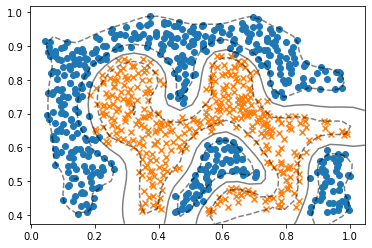

In [ ]:
from sklearn import svm
from math import exp
from numpy.linalg import norm
from scipy.spatial.distance import cdist

SIGMA=0.05

def gaussian_kernel(x, a):
    dist = cdist(x, a)
    return np.exp(-0.5 * dist**2 / SIGMA**2)

clf = svm.SVC(kernel=gaussian_kernel, C=1)
clf.fit(X, y)

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xlin = np.linspace(xlim[0], xlim[1], 30)
ylin = np.linspace(ylim[0], ylim[1], 30)
Y_grid, X_grid = np.meshgrid(ylin, xlin)
xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
P = clf.decision_function(xy).reshape(X_grid.shape)

ax.contour(X_grid, Y_grid, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

## Homework: Show how $c_i$ values from the dual problem can be translated to $w_i$ and $b$ (hard margin)

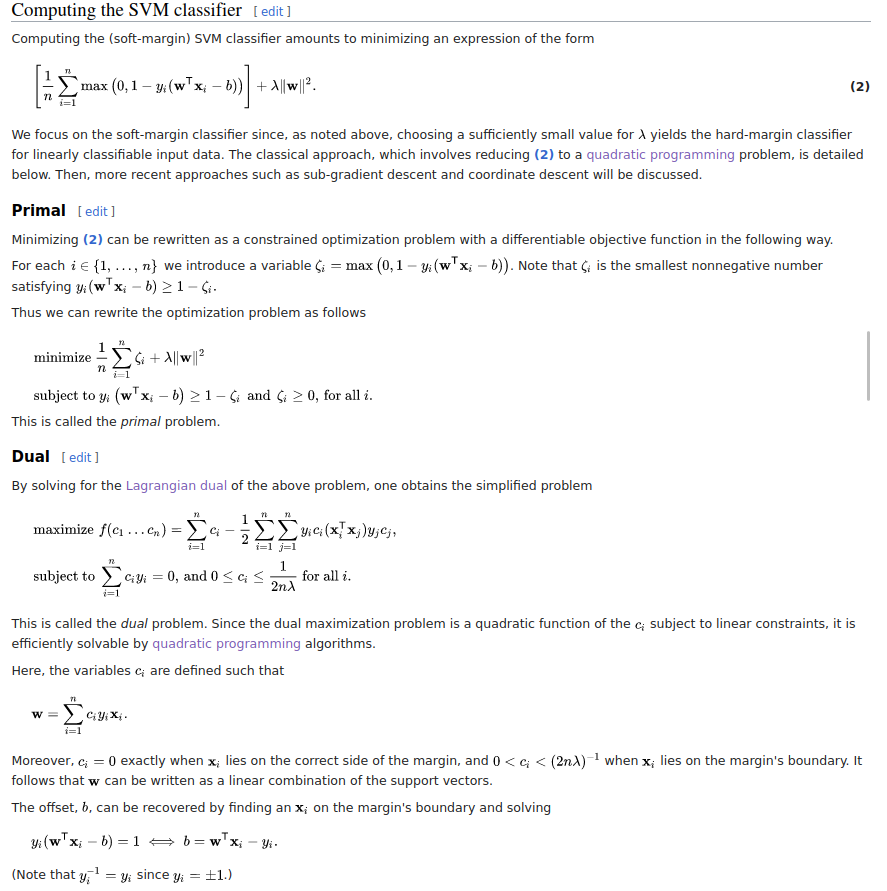

<center>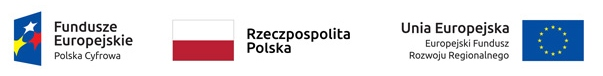</center>